In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import xgboost
from sklearn.metrics import mean_absolute_percentage_error
from joblib import dump, load
plt.rcParams['figure.figsize'] =  [18.0, 12.0]


# Constant paths 

In [5]:
# Data files PATH:
path_1 = r'cost_data.csv'
path_2 = r'features_basic'
path_3 = r'features_anomalies_removed'

In [6]:
col_subset = ['level_0', 'timestamp_1d', 'horizon', 'y', 'current:se:events-time_event_type=month_start:first',
       'time:day_of_week', 'time:day_of_month', 'time:month_of_quarter',
       'time:odd_month', 'time:middle_of_month']

In [13]:
def plot_split_training_prediction(parquet_path, col_subset=col_subset, show_plot=False, save=False, model_save_path=''):
    """
    It takes a parquet file as input, and outputs the predictions of the model on the last 100 rows of
    the parquet file.
    
    :param parquet_path: The path to the parquet file you want to use for training
    :param show_plot: If True, will show the plot of the prediction, defaults to False (optional)
    :param save: If True, the model will be saved to the specified path, defaults to False (optional)
    :param model_save_path: the path to save the model to
    :return: the test and prediction values for the model. and mape score.
    """

    df = pd.read_parquet(parquet_path)
    df2 = df[col_subset]
    df2 = df2[df2.horizon == 1]
    df2.drop(['horizon', 'level_0'], axis=1, inplace=True)
    model = xgboost.XGBRegressor()
    X_train = df2.iloc[:-100, 1:]
    X_test = df2.iloc[-100:, 1:]
    y_train = df2.y[:-100]
    y_test = df2.y[-100:]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    if show_plot:
        #plt.plot(df2.y,alpha=0.2)
        plt.plot(y_test,label='y_test')
        plt.plot(y_test.index,y_pred,'--', label='y_pred')
        plt.title(parquet_path+f'\nMAPE:{mape}')
        plt.legend()
        plt.ylabel('y')
        plt.show()
    if save:
        dump(model, os.path.join(model_save_path,
                                 f'{parquet_path[:-8]}_mape_{mape:.2f}.joblib'))
    return y_test, y_pred, mape


In [14]:
fnames = os.listdir(path_3)
media_live_fnames = [x for x in fnames if 'AWS_Elemental_MediaLive' in x and(x.endswith('parquet'))]

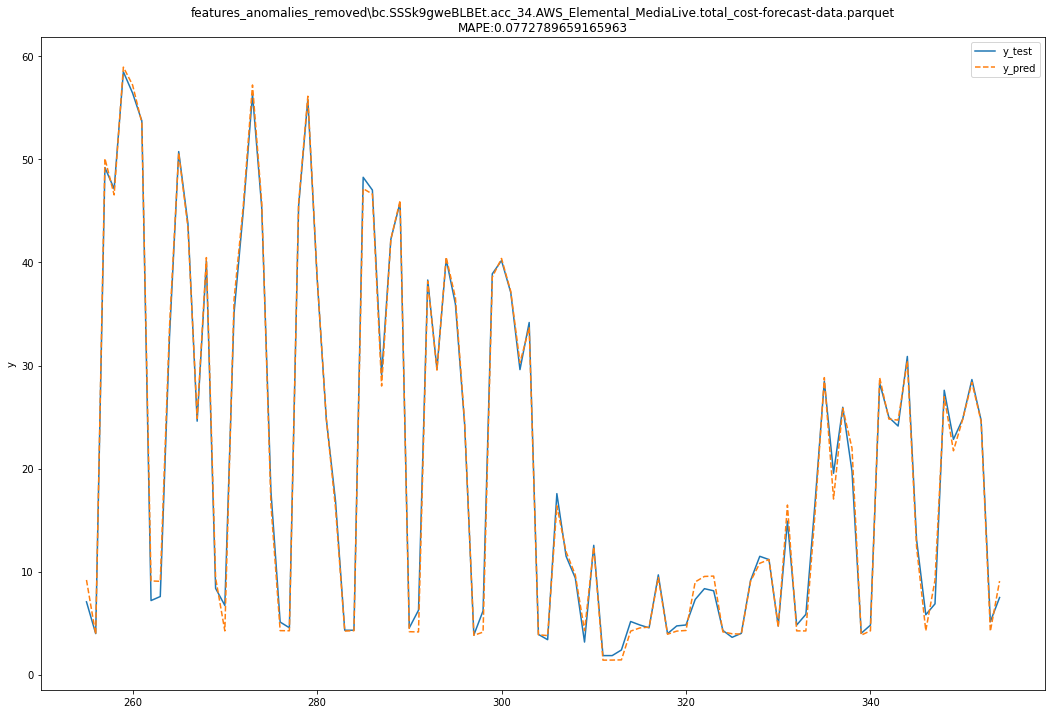

In [17]:
parquet_path =  os.path.join('features_anomalies_removed',media_live_fnames[3])
model_save_path = r'C:\Users\Aaron\Documents\YDATA\anodot\saved_models'

y_test,y_pred,mape  = plot_split_training_prediction(parquet_path,col_subset=col_subset,show_plot=True,save=True,model_save_path=model_save_path)

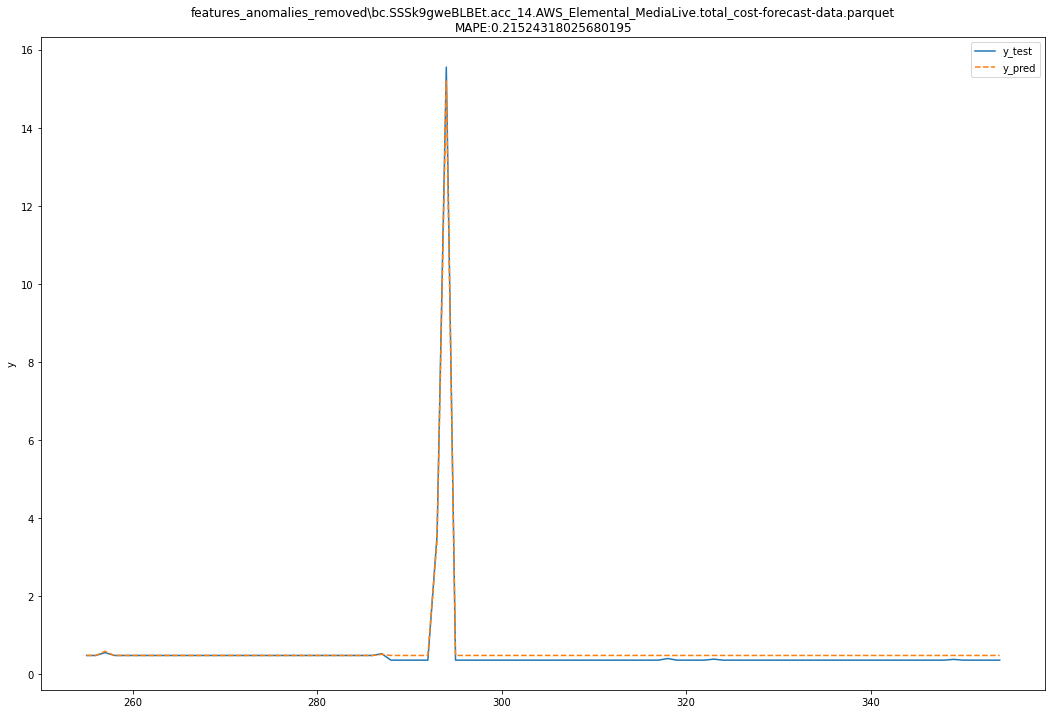

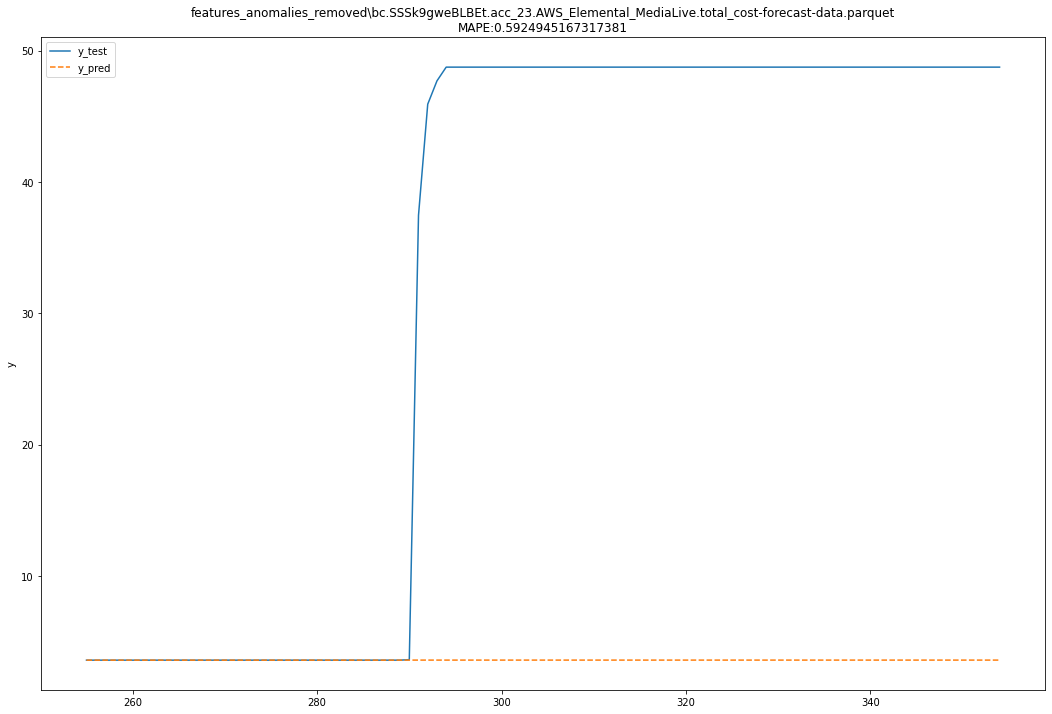

[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1

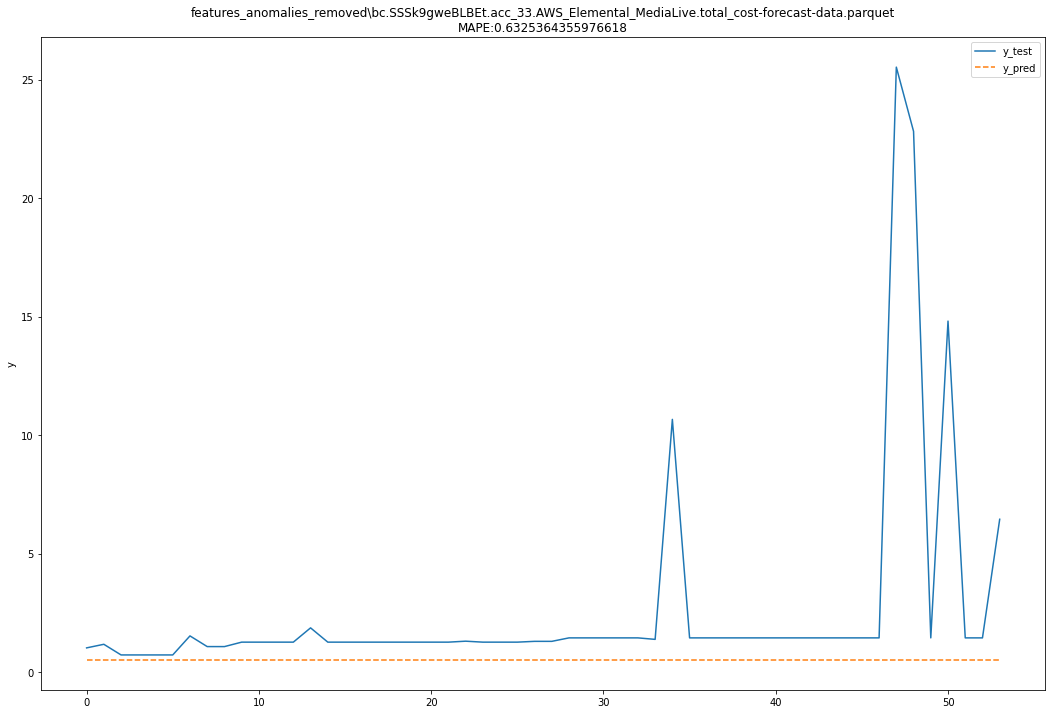

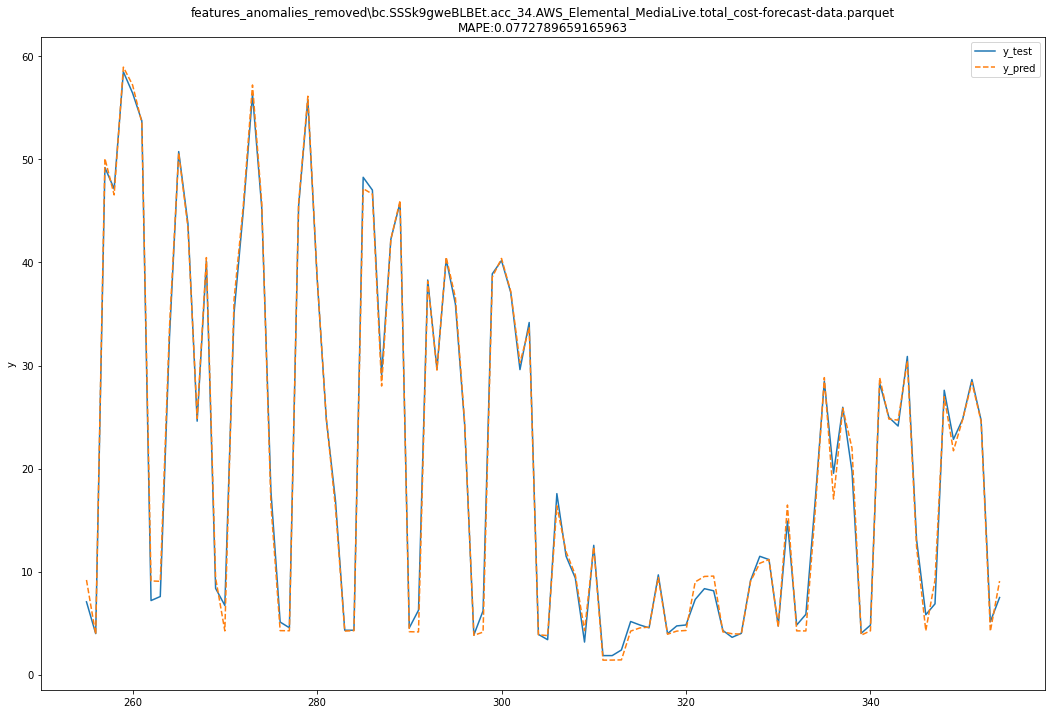

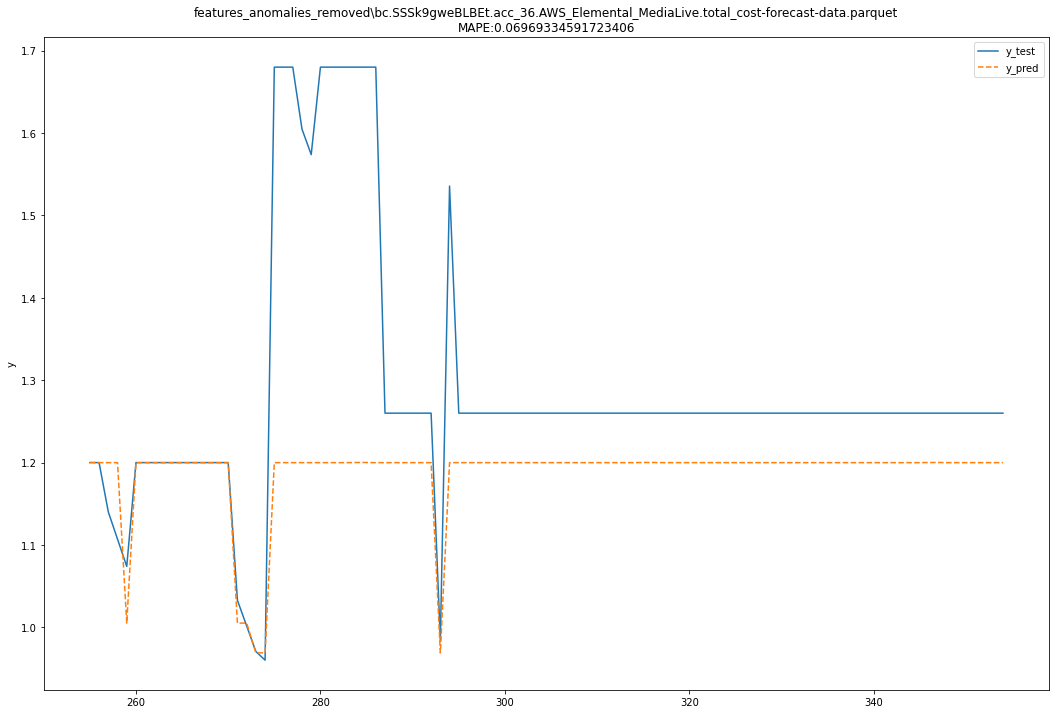

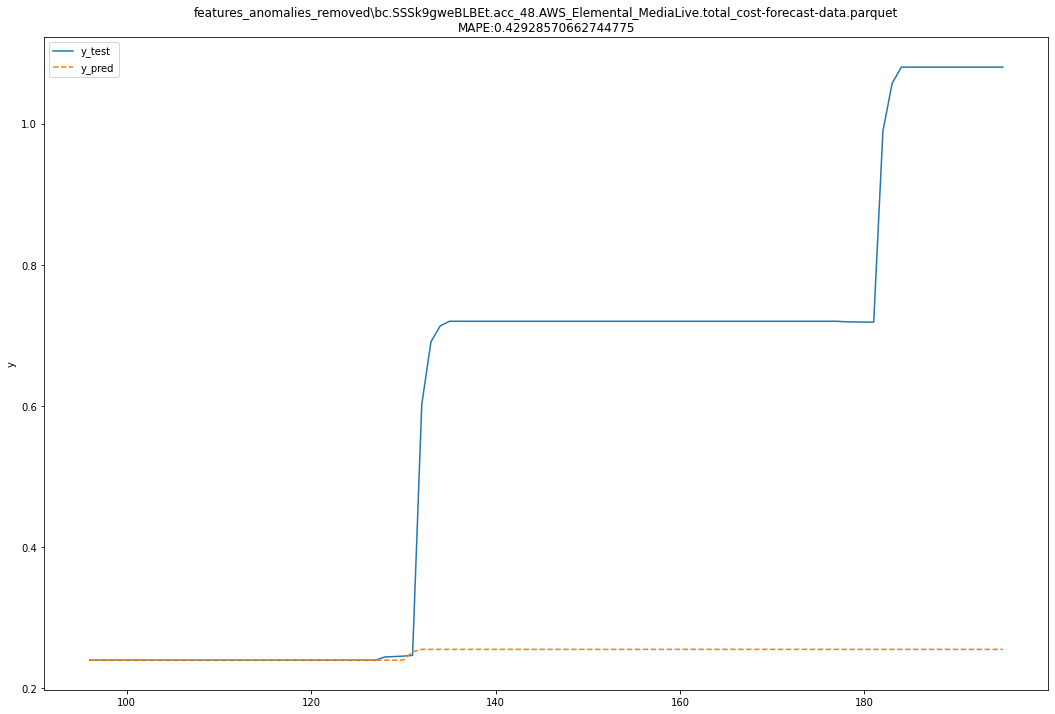

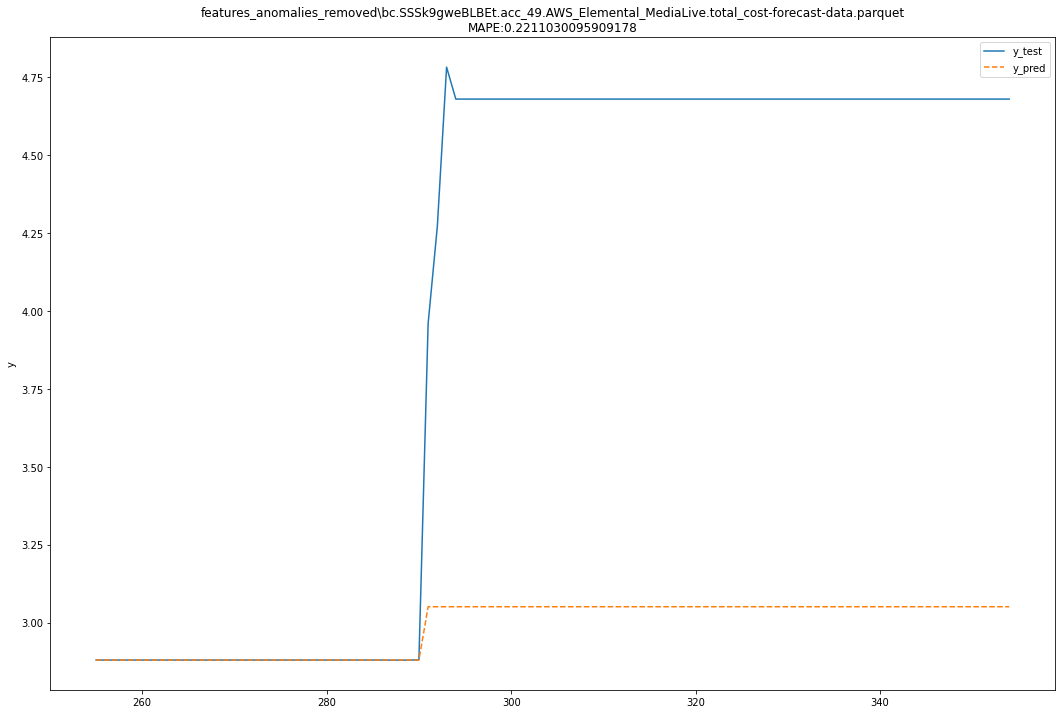

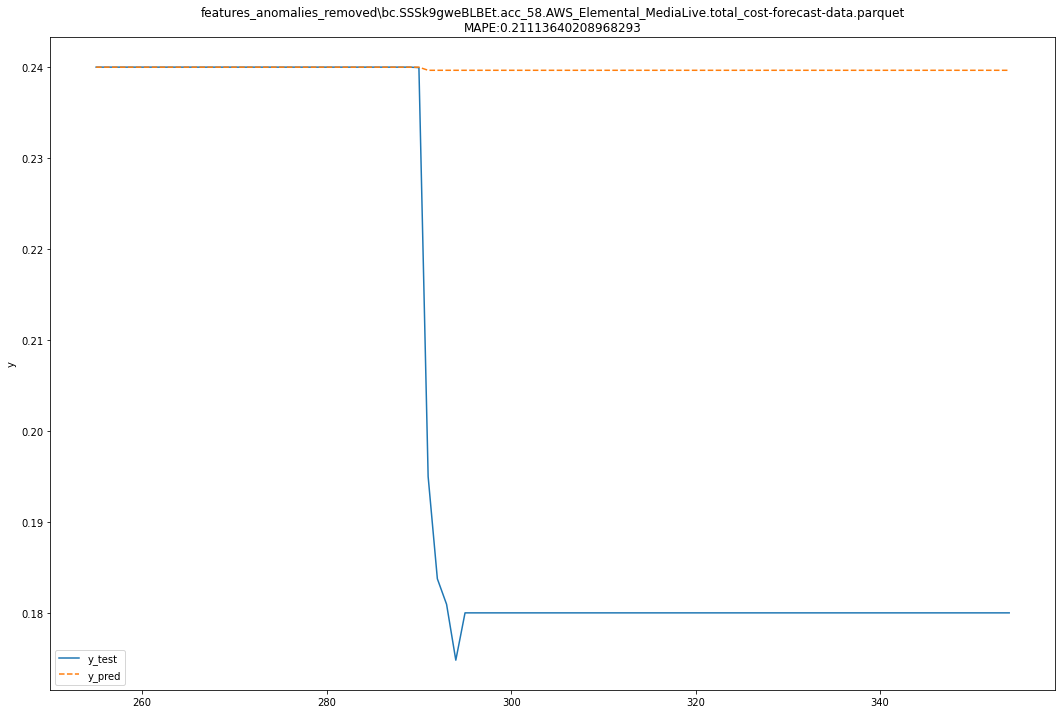

[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1265: Empty dataset at worker: 0
[16:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1

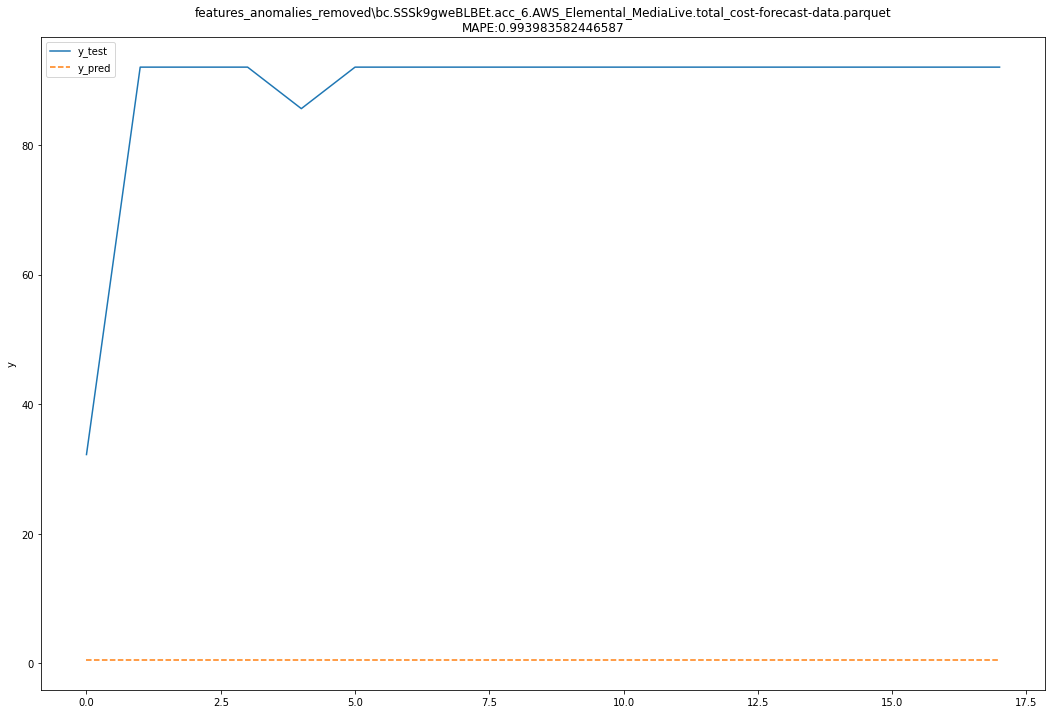

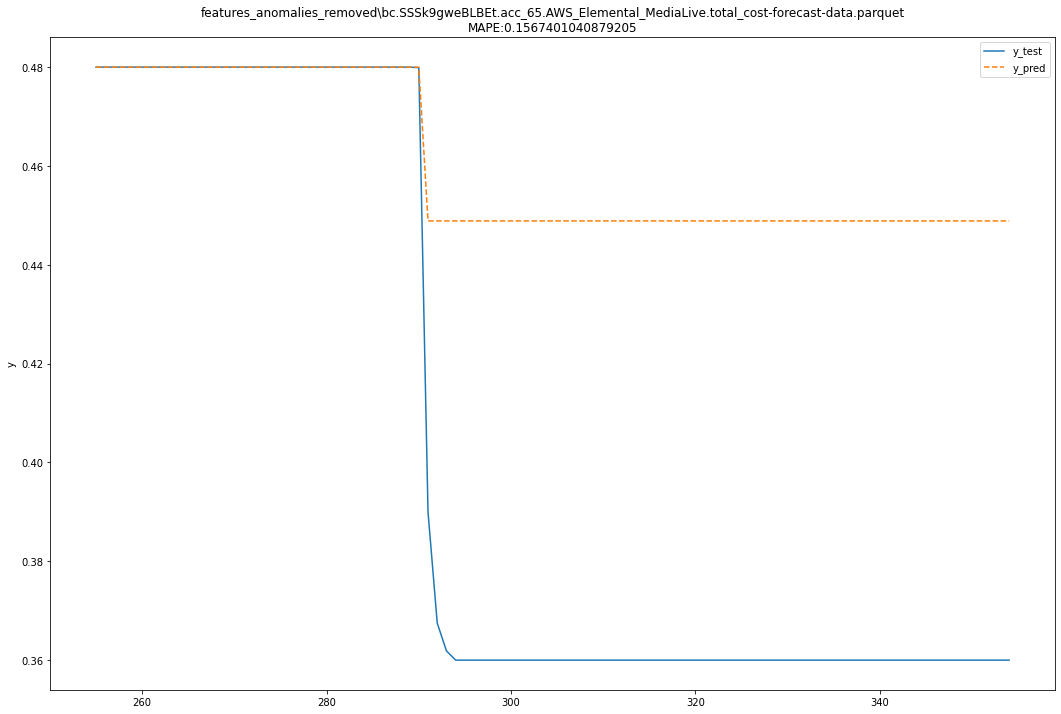

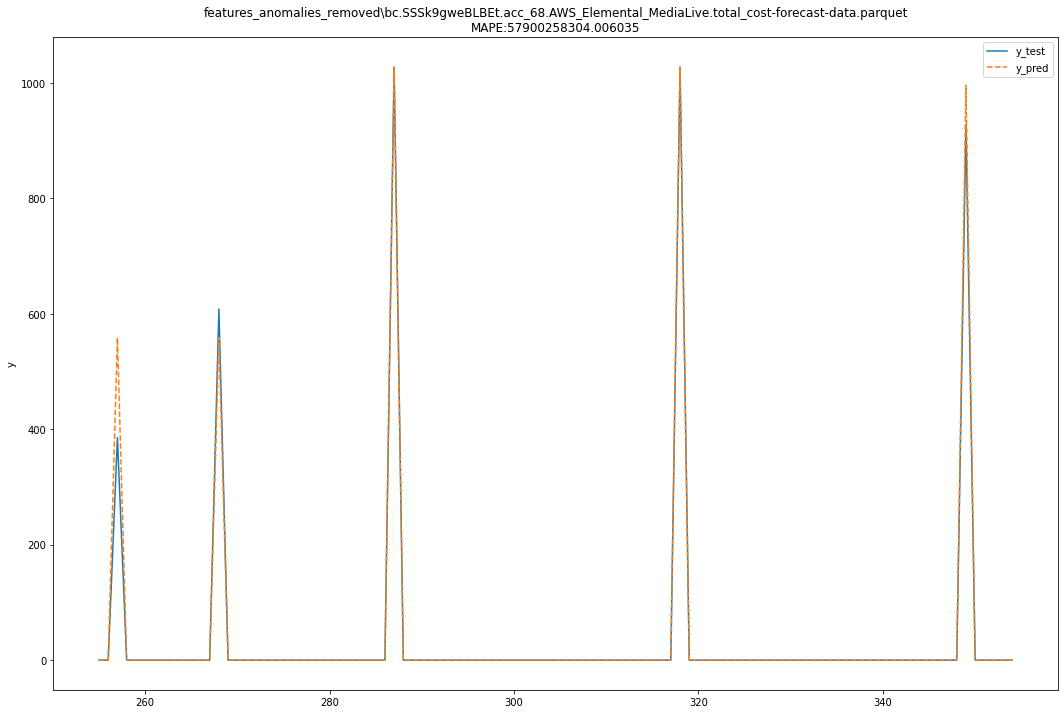

In [18]:
for fname in media_live_fnames:
    parquet_path =  os.path.join('features_anomalies_removed',fname)
    model_save_path = r'C:\Users\Aaron\Documents\YDATA\anodot\saved_models'
    try:
        y_test,y_pred,mape  = plot_split_training_prediction(parquet_path,col_subset=col_subset,show_plot=True)   
    except:
        pass